In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Concatenate, MaxPooling2D, Add, Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# pre-processing dei dataset

# normalizzazione
train_images = (train_images / 255)
test_images = (test_images / 255)

train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [4]:
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# trasformazione delle label tramite hot-encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_387 (Conv2D)            (None, 28, 28, 128)  256         ['input_36[0][0]']               
                                                                                                  
 conv2d_389 (Conv2D)            (None, 28, 28, 32)   64          ['input_36[0][0]']               
                                                                                                  
 max_pooling2d_53 (MaxPooling2D  (None, 28, 28, 1)   0           ['input_36[0][0]']               
 )                                                                                         

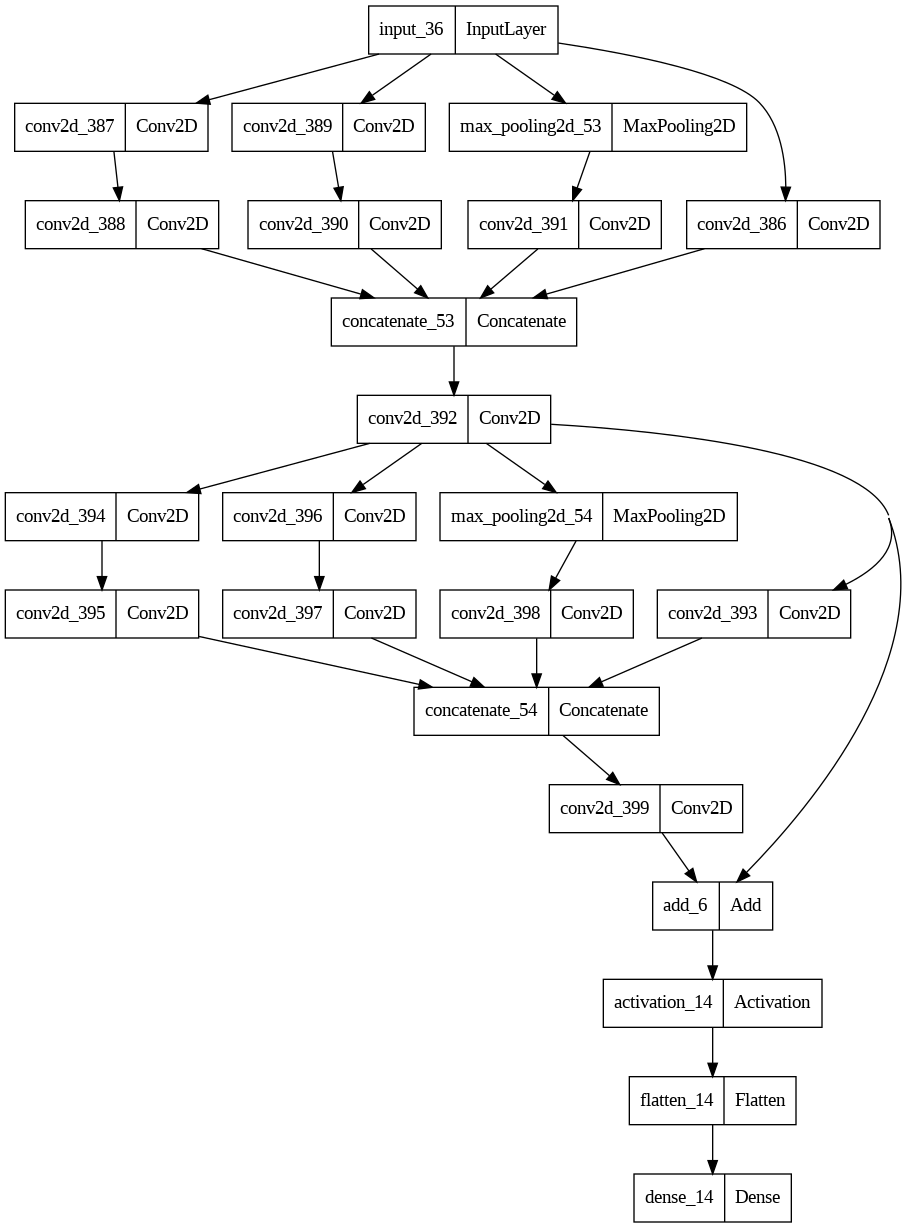

In [38]:
def get_block(input_layer, middles):

        # Branch 1: 1x1 Convolution
        branch_1 = Conv2D(64, (1, 1), activation='relu', padding='same')(input_layer)

        # Branch 2: 3x3 Convolution followed by 3x3 Convolution
        branch_2 = Conv2D(128, (1, 1), activation='relu', padding='same')(input_layer)
        branch_2 = Conv2D(128, (3, 3), activation='relu', padding='same')(branch_2)

        # Branch 3: 5x5 Convolution followed by two 3x3 Convolutions
        branch_3 = Conv2D(32, (1, 1), activation='relu', padding='same')(input_layer)
        branch_3 = Conv2D(32, (5, 5), activation='relu', padding='same')(branch_3)

        # Branch 4: Max pooling followed by 1x1 Convolution 32 filters
        branch_4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_layer)
        branch_4 = Conv2D(32, (1, 1), activation='relu')(branch_4)

        # Concatenate the outputs of the branches
        concatenated = Concatenate()([branch_1, branch_2, branch_3, branch_4])

        conv1 = Conv2D(32, (1, 1), activation='relu')(concatenated)

        middles.append(conv1)

        return conv1


middles = []


#----------------------------------------------------------
#--------------------- BLOCK 1 ----------------------------
#----------------------------------------------------------

# Create the input layer
input_layer = Input(shape=(28, 28, 1))

# Define the first block
b1_output = get_block(input_layer, middles)


#----------------------------------------------------------
#--------------------- BLOCK 2 ----------------------------
#----------------------------------------------------------

# Define the second block using the output of b1 as input
b2_output = get_block(b1_output, middles)





#----------------------------------------------------------
#---------------------- DENSE -----------------------------
#----------------------------------------------------------

conv = Conv2D(32, (1, 1))(b2_output)

res = Add()([ middles[0], middles[1]])

conv = Activation('relu')(res)


flatten_layer = Flatten()(conv)

output = Dense(units=10, activation='softmax')(flatten_layer)



# Create a new model that connects the outputs of b1 and b2
model = tf.keras.Model(inputs=input_layer, outputs=output)

# Print the summary of the model
model.summary()

print(middles)

plot_model(model)

Model: "Test"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_37 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_402 (Conv2D)            (None, 28, 28, 128)  256         ['input_37[0][0]']               
                                                                                                  
 conv2d_404 (Conv2D)            (None, 28, 28, 32)   64          ['input_37[0][0]']               
                                                                                                  
 max_pooling2d_55 (MaxPooling2D  (None, 28, 28, 1)   0           ['input_37[0][0]']               
 )                                                                                             

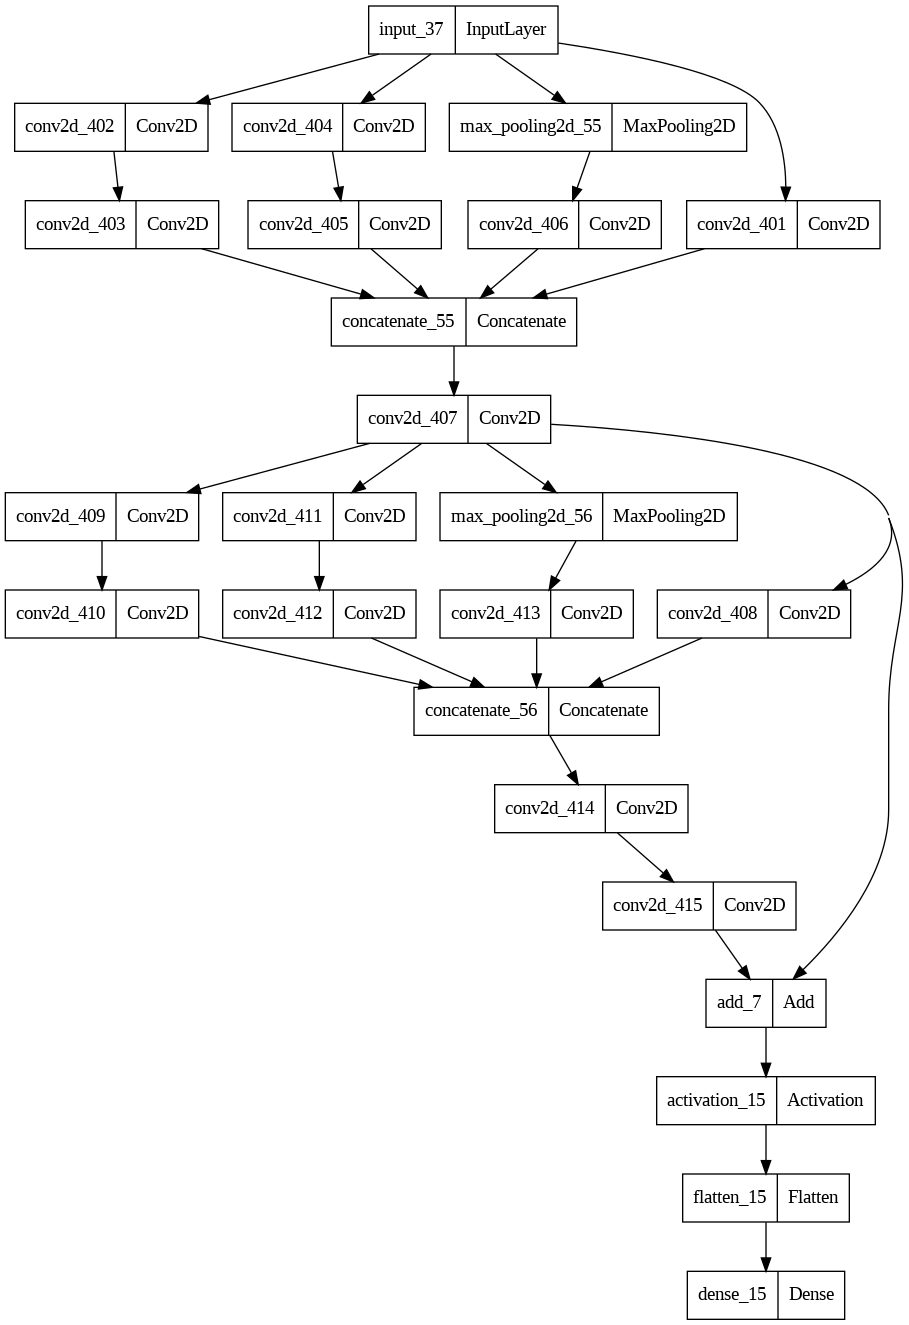

In [39]:
#----------------------------------------------------------
#--------------------- BLOCK 1 ----------------------------
#----------------------------------------------------------

# Define input layer
input_layer = Input(shape=(28, 28, 1))


# Branch 1: 1x1 Convolution
branch_1 = Conv2D(64, (1, 1), activation='relu', padding='same')(input_layer)


# Branch 2: 3x3 Convolution followed by 3x3 Convolution
branch_2 = Conv2D(128, (1, 1), activation='relu', padding='same')(input_layer)
branch_2 = Conv2D(128, (3, 3), activation='relu', padding='same')(branch_2)

# Branch 3: 5x5 Convolution followed by two 3x3 Convolutions
branch_3 = Conv2D(32, (1, 1), activation='relu', padding='same')(input_layer)
branch_3 = Conv2D(32, (5, 5), activation='relu', padding='same')(branch_3)

# Branch 4: Max pooling followed by 1x1 Convolution 32 filters
branch_4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_layer)
branch_4 = Conv2D(32, (1, 1), activation='relu')(branch_4)


# Concatenate the outputs of the branches
concatenated = Concatenate()([branch_1, branch_2, branch_3, branch_4])


conv1 = Conv2D(32, (1, 1), activation='relu')(concatenated)

#----------------------------------------------------------
#--------------------- BLOCK 2 ----------------------------
#----------------------------------------------------------



# Branch 1: 1x1 Convolution
branch_1 = Conv2D(64, (1, 1), activation='relu', padding='same')(conv1)


# Branch 2: 3x3 Convolution followed by 3x3 Convolution
branch_2 = Conv2D(128, (1, 1), activation='relu', padding='same')(conv1)
branch_2 = Conv2D(128, (3, 3), activation='relu', padding='same')(branch_2)

# Branch 3: 5x5 Convolution followed by two 3x3 Convolutions
branch_3 = Conv2D(32, (1, 1), activation='relu', padding='same')(conv1)
branch_3 = Conv2D(32, (5, 5), activation='relu', padding='same')(branch_3)

# Branch 4: Max pooling followed by 1x1 Convolution 32 filters
branch_4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(conv1)
branch_4 = Conv2D(32, (1, 1), activation='relu')(branch_4)


# Concatenate the outputs of the branches
concatenated = Concatenate()([branch_1, branch_2, branch_3, branch_4])


conv2 = Conv2D(32, (1, 1), activation='relu')(concatenated)


conv3 = Conv2D(32, (1, 1))(conv2)
res = Add()([conv1, conv3])
conv3 = Activation('relu')(res)

flatten_layer = Flatten()(conv3)

dense = Dense(units=10, activation='softmax')(flatten_layer)


output = dense


model = tf.keras.models.Model(
    inputs=[input_layer],
    outputs=[output],
    name='Test'
)

model.compile(
  optimizer=Adam(learning_rate=0.005),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Create the Inception block model
#inception_block = Model(inputs=input_layer, outputs=output)

# Print the model summary
model.summary()


plot_model(model)

In [ ]:
history_res = model.fit(
    x=train_images, # training dataset
    y=train_labels, # training labels
    epochs=10,
    batch_size=512,
    validation_data=(
        test_images, # testing dataset
        test_labels  # testing labels
    )
)

Epoch 1/50
  1/118 [..............................] - ETA: 58:53 - loss: 2.3026 - accuracy: 0.1113